## Heart Failure Prediction


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("E:\Assignment 5th sem\Python language design practice\Final\Heart-Failure-Prediction-and-Deployment-with-Flask-and-Heroku-main\heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  seru

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df.duplicated().any()

False

### Visualizing the Distribution of the Target Variable

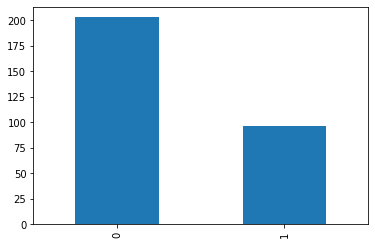

In [11]:
df['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.show()

### Correlation Matrix

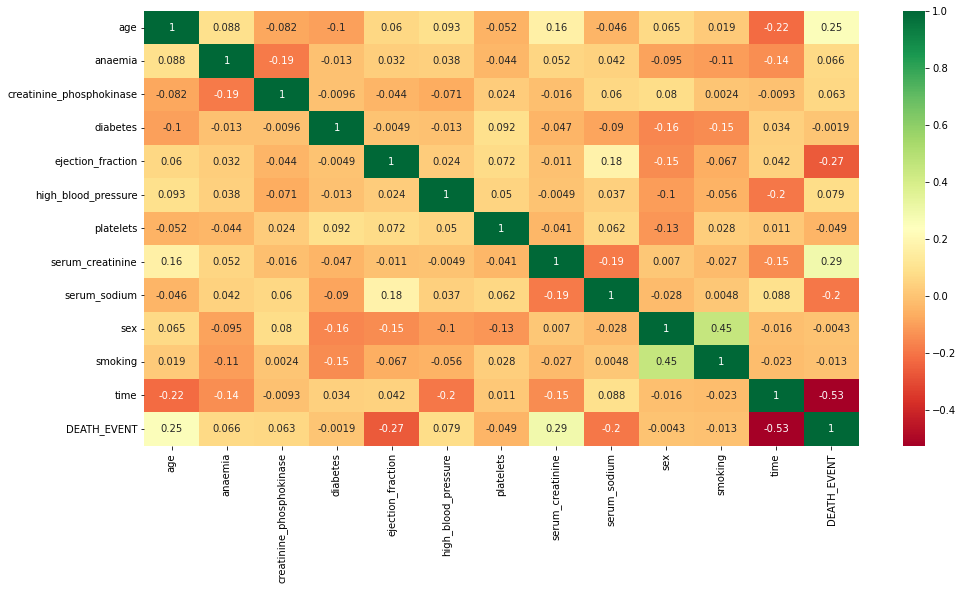

In [12]:
plt.figure(figsize=[16,8])
corr = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

### Visualizing the distribution of each variable

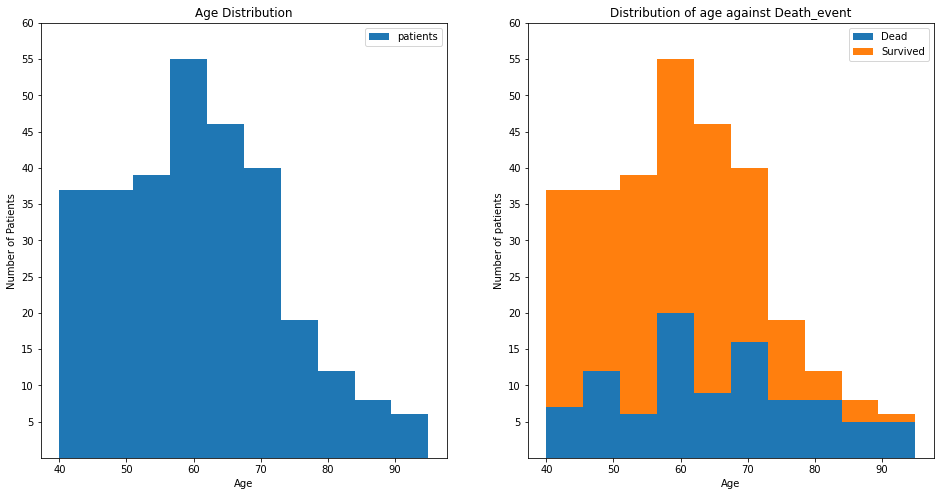

In [13]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['age'],label = 'patients')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[0].legend()
ax[0].set_title('Age Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['age'],df[df['DEATH_EVENT']==0]['age']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[1].set_title('Distribution of age against Death_event')
ax[1].legend()

In [14]:
anaemia = df['anaemia'].value_counts().reset_index()
anaemia.columns = ['anaemia', 'count']

fig = px.pie(
    anaemia, 
    values='count', 
    names="anaemia", 
    title='Anaemia Distribution', 
)

fig.show()

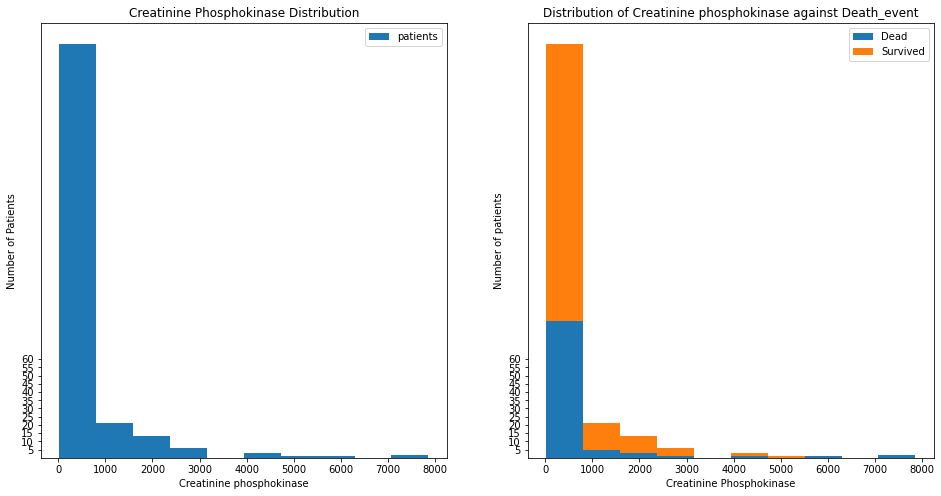

In [16]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['creatinine_phosphokinase'],label = 'patients')
ax[0].set_xlabel('Creatinine phosphokinase')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[0].legend()
ax[0].set_title('Creatinine Phosphokinase Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['creatinine_phosphokinase'],df[df['DEATH_EVENT']==0]['creatinine_phosphokinase']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Creatinine Phosphokinase')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[1].set_title('Distribution of Creatinine phosphokinase against Death_event')
ax[1].legend()

In [17]:
diabetes = df['diabetes'].value_counts().reset_index()
diabetes.columns = ['diabetes', 'count']

fig = px.pie(
    diabetes, 
    values='count', 
    names="diabetes", 
    title='Diabetes bar chart', 
)

fig.show()

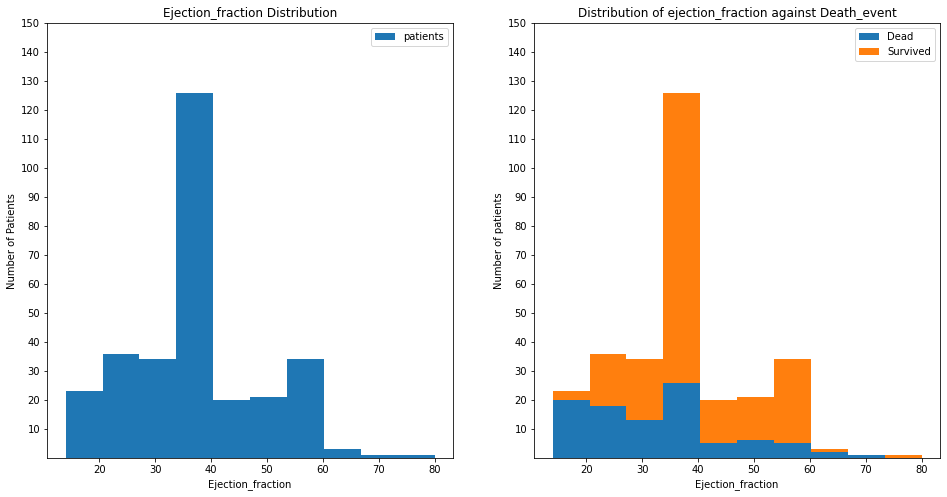

In [18]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['ejection_fraction'], label = 'patients')
ax[0].set_xlabel('Ejection_fraction')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Ejection_fraction Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['ejection_fraction'],df[df['DEATH_EVENT']==0]['ejection_fraction']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('Ejection_fraction')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of ejection_fraction against Death_event')
ax[1].legend()

In [19]:
hbp = df['high_blood_pressure'].value_counts().reset_index()
hbp.columns = ['high_blood_pressure', 'count']

fig = px.pie(
    hbp, 
    values='count', 
    names="high_blood_pressure", 
    title='High_blood_pressure Distribution', 
)

fig.show()

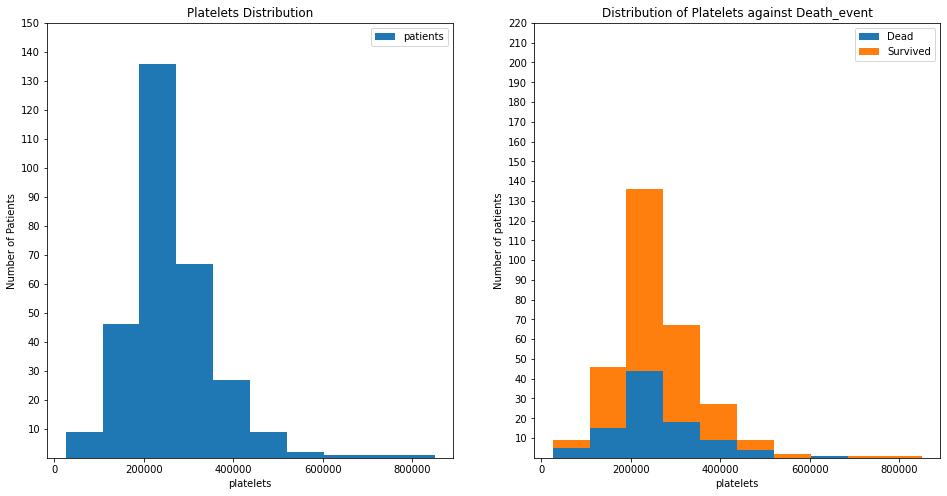

In [20]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['platelets'], label = 'patients')
ax[0].set_xlabel('platelets')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Platelets Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['platelets'],df[df['DEATH_EVENT']==0]['platelets']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('platelets')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks(([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]))
ax[1].set_title('Distribution of Platelets against Death_event')
ax[1].legend()

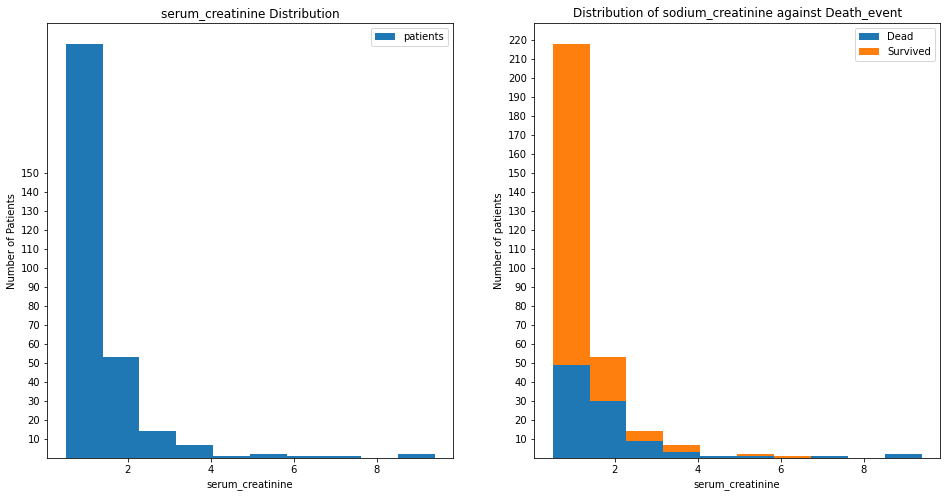

In [21]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['serum_creatinine'], label = 'patients')
ax[0].set_xlabel('serum_creatinine')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('serum_creatinine Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['serum_creatinine'],df[df['DEATH_EVENT']==0]['serum_creatinine']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('serum_creatinine')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks(([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]))
ax[1].set_title('Distribution of sodium_creatinine against Death_event')
ax[1].legend()

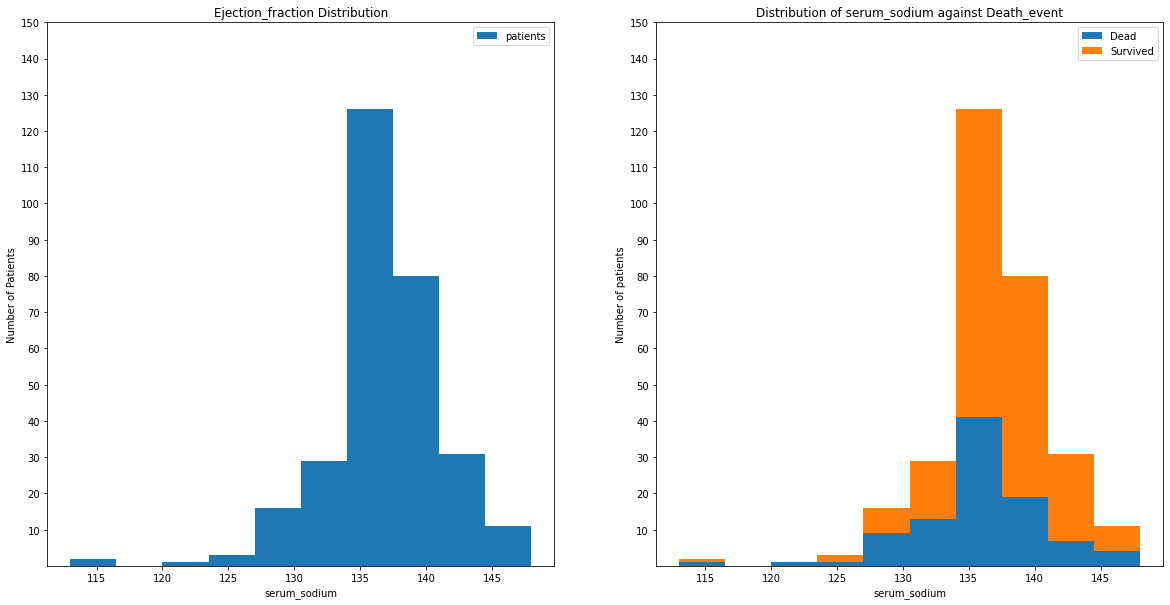

In [22]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(df['serum_sodium'], label = 'patients')
ax[0].set_xlabel('serum_sodium')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Ejection_fraction Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['serum_sodium'],df[df['DEATH_EVENT']==0]['serum_sodium']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('serum_sodium')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of serum_sodium against Death_event')
ax[1].legend()

In [23]:
sex = df['sex'].value_counts().reset_index()
sex.columns = ['sex', 'count']

fig = px.pie(
    sex, 
    values='count', 
    names="sex", 
    title='Sex Distribution', 
)

fig.show()

In [24]:
smoking = df['smoking'].value_counts().reset_index()
smoking.columns = ['smoking', 'count']

fig = px.pie(
    smoking, 
    values='count', 
    names="smoking", 
    title='Smoking Distribution', 
)

fig.show()

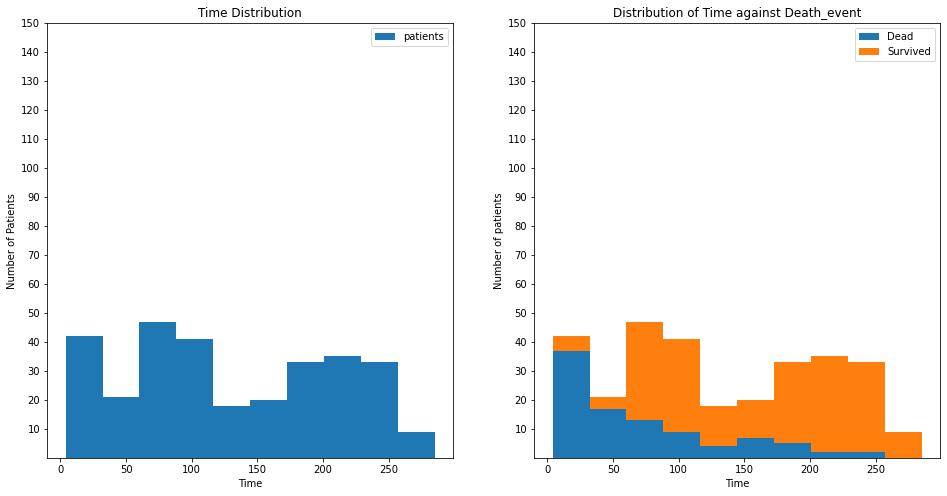

In [25]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['time'], label = 'patients')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Time Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['time'],df[df['DEATH_EVENT']==0]['time']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of Time against Death_event')
ax[1].legend()

### Feature Selection

In [26]:
features = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]

### Splitting Data

In [27]:
X = df[['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine']]
y = df['DEATH_EVENT']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

#### Data Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

### Support Vector Classifier

In [33]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

In [34]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [35]:
predictions.shape

(60,)

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
print("Confusion Matrix : \n\n" , confusion_matrix(predictions,y_test))

Confusion Matrix : 

 [[33 11]
 [ 4 12]]


In [38]:
print("Classification Report : \n\n" , classification_report(predictions,y_test),"\n")

Classification Report : 

               precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.52      0.75      0.62        16

    accuracy                           0.75        60
   macro avg       0.71      0.75      0.72        60
weighted avg       0.79      0.75      0.76        60
 



In [39]:
import pickle

In [40]:
pickle.dump(svm, open('model.pkl', 'wb'))

In [41]:
model = pickle.load(open('model.pkl', 'rb'))
print(model)

SVC()
